In [239]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 62FE-3091

 Directory of C:\Users\JonMc\Documents\Flatiron\MS-movie-studio-project\zippedData

10/03/2022  01:52 PM    <DIR>          .
10/03/2022  04:49 PM    <DIR>          ..
09/30/2022  05:14 PM            53,544 bom.movie_gross.csv.gz
10/03/2022  12:25 PM    <DIR>          im.db
09/30/2022  05:14 PM        67,149,708 im.db.zip
10/03/2022  12:41 PM         1,220,764 Netflix_movies_and_tv_shows_clustering.csv.zip
09/30/2022  05:14 PM           498,202 rt.movie_info.tsv.gz
09/30/2022  05:14 PM         3,402,194 rt.reviews.tsv.gz
09/30/2022  05:14 PM           827,840 tmdb.movies.csv.gz
09/30/2022  05:14 PM           153,218 tn.movie_budgets.csv.gz
10/03/2022  01:52 PM             3,608 video_game_films.csv
               8 File(s)     73,309,078 bytes
               3 Dir(s)  401,602,854,912 bytes free


In [241]:
conn = sqlite3.connect('./im.db/im.db')

In [242]:
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res.fetchall():
    print(name[0])

movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In [244]:
pd.read_sql("""
SELECT
    genres
FROM 
    movie_basics
;""", conn).describe()

,genres
count,140736
unique,1085
top,Documentary
freq,32185


In [246]:
pd.read_sql("""
SELECT
    genres
FROM 
    movie_basics
;""", conn).value_counts()

genres                       
Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
                                 ...  
Documentary,Horror,Romance           1
Documentary,Horror,Reality-TV        1
Animation,Biography,Fantasy          1
Documentary,Horror,News              1
History,Reality-TV,War               1
Length: 1085, dtype: int64

In [245]:
pd.read_sql("""
SELECT
    averagerating
FROM 
    movie_ratings
;""", conn).describe()

,averagerating
count,73856.000000
mean,6.332729
std,1.474978
min,1.000000
25%,5.500000
50%,6.500000
75%,7.400000
max,10.000000


In [ ]:
pd.read_sql("""
SELECT
    
FROM





""")

In [180]:
df_bom = pd.read_csv('bom.movie_gross.csv.gz')
df_bom.index

RangeIndex(start=0, stop=3387, step=1)

In [181]:
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [215]:
df_rt_movie = pd.read_csv('rt.movie_info.tsv.gz', delimiter="\t")
df_rt_movie.index

RangeIndex(start=0, stop=1560, step=1)

In [216]:
df_rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [228]:
df_rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [224]:
df_rt_movie.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [220]:
df_rt_movie_clean = df_rt_movie.dropna(subset=['box_office'])
df_rt_movie_clean.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures


In [229]:
df_rt_movie_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 1 to 1555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                340 non-null    int64 
 1   synopsis          340 non-null    object
 2   rating            340 non-null    object
 3   genre             340 non-null    object
 4   director          299 non-null    object
 5   writer            273 non-null    object
 6   theater_date      334 non-null    object
 7   dvd_date          334 non-null    object
 8   currency          340 non-null    object
 9   box_office        340 non-null    object
 10  runtime           338 non-null    object
 11  studio            305 non-null    object
 12  total_box_office  340 non-null    object
dtypes: int64(1), object(12)
memory usage: 37.2+ KB


In [221]:
df_rt_movie_clean['total_box_office'] = df_rt_movie_clean['box_office'].str.replace(',','')
df_rt_movie_clean.head()

<ipython-input-221-9d525d92659b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt_movie_clean['total_box_office'] = df_rt_movie_clean['box_office'].str.replace(',','')


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,total_box_office
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,600000
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,41032915
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics,224114
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN,134904
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures,1039869


In [222]:
top_box_office = df_rt_movie_clean.sort_values('total_box_office', ascending=False)
top_box_office

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,total_box_office
16,23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013","Mar 18, 2014",$,"99,165,609",129 minutes,Sony Pictures,99165609
1510,1944,"In the 3D action-comedy The Green Hornet, Brit...",PG-13,Action and Adventure|Comedy|Science Fiction an...,Michel Gondry,Evan Goldberg|Seth Rogen,"Jan 14, 2011","May 3, 2011",$,"98,000,000",119 minutes,Sony Pictures,98000000
207,274,Natalie Portman stars in this western concerni...,R,Action and Adventure|Drama|Western,NaN,NaN,"Jan 29, 2016","Apr 26, 2016",$,"976,847",97 minutes,NaN,976847
1469,1890,A misplaced sausage and his savory friends emb...,R,Animation|Comedy,Conrad Vernon|Greg Tiernan,Kyle Hunter|Ariel Shaffir|Seth Rogen|Evan Gold...,"Aug 12, 2016","Nov 8, 2016",$,"97,661,826",89 minutes,Sony Pictures,97661826
1323,1711,"Directed by Garry Marshall, The Princess Diari...",G,Comedy|Kids and Family,Garry Marshall,Shonda Rhimes,"Aug 11, 2004","Dec 14, 2004",$,"95,111,012",113 minutes,NaN,95111012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,1340,"Produced by MTV Films, The Perfect Score is a ...",PG-13,Comedy|Drama|Mystery and Suspense,Brian Robbins,Mark Schwahn|Marc Hyman|Jon Zack,"Jan 30, 2004","Jun 29, 2004",$,"10,279,192",92 minutes,Paramount Pictures,10279192
1161,1494,The Girl with the Dragon Tattoo is the first f...,R,Drama|Mystery and Suspense,David Fincher,Steven Zaillian,"Dec 20, 2011","Mar 20, 2012",$,"102,515,793",157 minutes,Sony Pictures,102515793
1300,1680,James White (Christopher Abbott) is a troubled...,R,Drama,Josh Mond,Josh Mond,"Nov 13, 2015","Mar 22, 2016",$,"101,368",85 minutes,The Film Arcade,101368
888,1149,A failing high-school football coach finds tha...,PG,Drama|Faith and Spirituality,Alex Kendrick|Stephen Kendrick,Alex Kendrick|Stephen Kendrick,"Sep 29, 2006","Jan 30, 2007",$,"10,127,352",111 minutes,Destination Film,10127352


In [ ]:
top_votes = top_vote_avg.loc[(top_votes['vote_count'] > 10000) & (top_votes['vote_average'] > 7)]
top_votes[:25]

In [184]:
df_rt_reviews = pd.read_csv('rt.reviews.tsv.gz', encoding='windows-1252', delimiter="\t")
df_rt_reviews.index

RangeIndex(start=0, stop=54432, step=1)

In [185]:
df_rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [279]:
df_tmdb = pd.read_csv('tmdb.movies.csv.gz')
df_tmdb.index

RangeIndex(start=0, stop=26517, step=1)

In [280]:
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [305]:
top_vote_avg = df_tmdb.sort_values('vote_average', ascending=False)
top_vote_avg

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
13258,13258,[99],403294,en,9/11: Simulations,0.600,2014-07-04,9/11: Simulations,10.0,1
22787,22787,"[27, 35]",444170,en,Lasagna Cat - Telephone Sex Survey Results,0.722,2017-02-23,Lasagna Cat - Telephone Sex Survey Results,10.0,1
22592,22592,[99],488357,en,MOTO 9: The Movie,0.900,2017-11-21,MOTO 9: The Movie,10.0,1
22607,22607,[],437448,en,The Letter Carrier,0.895,2017-01-27,The Letter Carrier,10.0,1
22610,22610,"[9648, 37, 18, 10402]",463601,en,Hope This Goes Over Well/Living in an Empty World,0.894,2017-06-26,Hope This Goes Over Well/Living in an Empty World,10.0,1
...,...,...,...,...,...,...,...,...,...,...
11018,11018,[],124727,en,Darkchylde,0.600,2013-08-09,Darkchylde,0.0,1
14168,14168,[],167531,en,Summer Snow,0.600,2014-07-25,Summer Snow,0.0,1
14167,14167,"[99, 10402]",221918,en,Butch Walker: Out of Focus,0.600,2014-08-05,Butch Walker: Out of Focus,0.0,1
20601,20601,"[18, 35]",448105,en,The Angry Man,0.600,2017-04-08,The Angry Man,0.0,1


In [282]:
type(top_votes['vote_count'][0])

numpy.int64

In [283]:
type(top_votes['vote_average'][0])

numpy.float64

In [306]:
top_votes = top_vote_avg.loc[(top_vote_avg['vote_count'] > 10000) & (top_vote_avg['vote_average'] > 7)]
top_votes

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
11032,11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597
2472,2472,"[10751, 16, 18]",8587,en,The Lion King,28.583,1994-06-23,The Lion King,8.2,10160
19,19,"[18, 53, 9648]",11324,en,Shutter Island,18.060,2010-02-18,Shutter Island,8.1,12625
2471,2471,"[10751, 14, 12]",12445,en,Harry Potter and the Deathly Hallows: Part 2,29.206,2011-07-15,Harry Potter and the Deathly Hallows: Part 2,8.1,11567
11026,11026,"[36, 18, 53, 10752]",205596,en,The Imitation Game,33.078,2014-12-19,The Imitation Game,8.1,10396
5189,5189,"[18, 37]",68718,en,Django Unchained,21.260,2012-12-25,Django Unchained,8.0,15725
14184,14184,"[18, 35, 16, 10751]",150540,en,Inside Out,24.797,2015-06-19,Inside Out,8.0,12691
17443,17443,"[35, 18, 10749]",313369,en,La La Land,16.275,2016-12-09,La La Land,7.9,10028


In [312]:
top_10_votes = top_votes[:10]
top_10_votes

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
11032,11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597
2472,2472,"[10751, 16, 18]",8587,en,The Lion King,28.583,1994-06-23,The Lion King,8.2,10160
19,19,"[18, 53, 9648]",11324,en,Shutter Island,18.060,2010-02-18,Shutter Island,8.1,12625
2471,2471,"[10751, 14, 12]",12445,en,Harry Potter and the Deathly Hallows: Part 2,29.206,2011-07-15,Harry Potter and the Deathly Hallows: Part 2,8.1,11567
11026,11026,"[36, 18, 53, 10752]",205596,en,The Imitation Game,33.078,2014-12-19,The Imitation Game,8.1,10396
5189,5189,"[18, 37]",68718,en,Django Unchained,21.260,2012-12-25,Django Unchained,8.0,15725
14184,14184,"[18, 35, 16, 10751]",150540,en,Inside Out,24.797,2015-06-19,Inside Out,8.0,12691
17443,17443,"[35, 18, 10749]",313369,en,La La Land,16.275,2016-12-09,La La Land,7.9,10028


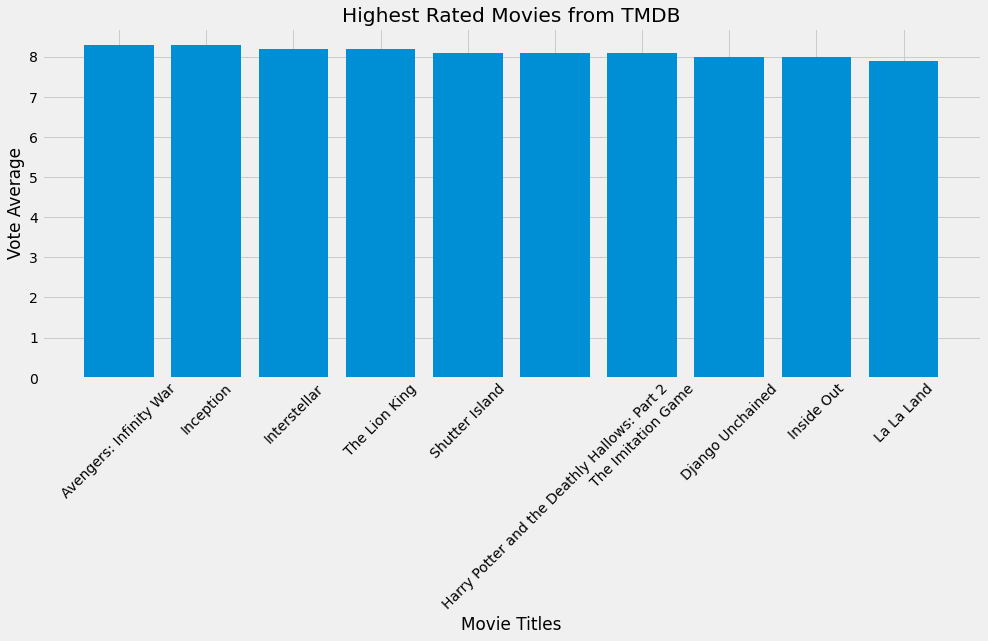

In [313]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.style.use('fivethirtyeight')

x=top_10_votes['original_title']
y=top_10_votes['vote_average']

ax.bar(x, height=y)

ax.set_xlabel('Movie Titles')
ax.set_ylabel('Vote Average')
ax.set_title('Highest Rated Movies from TMDB')
plt.tick_params(axis='x', colors='black', direction='out', labelrotation=45)
plt.tick_params(axis='y', colors='black', direction='in');

MOVIE
Action          28
Adventure       12
Animation       16
Comedy          35
Crime           80
Documentary     99
Drama           18
Family          10751
Fantasy         14
History         36
Horror          27
Music           10402
Mystery         9648
Romance         10749
Science Fiction 878
TV Movie        10770
Thriller        53
War             10752
Western         37

In [309]:
top_votes_adventure = top_votes['genre_ids'].str.replace('12', 'Adventure')
top_votes_adventure

23811               [Adventure, 28, 14]
4                  [28, 878, Adventure]
11032              [Adventure, 18, 878]
2472                    [10751, 16, 18]
19                       [18, 53, 9648]
2471             [10751, 14, Adventure]
11026               [36, 18, 53, 10752]
5189                           [18, 37]
14184               [18, 35, 16, 10751]
17443                   [35, 18, 10749]
3                       [16, 35, 10751]
11021              [28, 878, Adventure]
11027                    [9648, 53, 18]
2473                    [16, 35, 10751]
20688                   [35, 18, 10749]
7883                       [80, 18, 35]
11024    [Adventure, 10751, 16, 28, 35]
14170    [Adventure, 10751, 16, 28, 35]
20620                     [28, 18, 878]
20622          [28, Adventure, 35, 878]
14188              [18, Adventure, 878]
17397              [18, Adventure, 878]
5182                   [28, 80, 18, 53]
11063              [28, Adventure, 878]
0                [Adventure, 14, 10751]


In [315]:
top_votes_adv_drama = top_votes_adventure.str.replace('18', 'Drama')
top_votes_adv_drama

23811               [Adventure, 28, 14]
4                  [28, 878, Adventure]
11032           [Adventure, Drama, 878]
2472                 [10751, 16, Drama]
19                    [Drama, 53, 9648]
2471             [10751, 14, Adventure]
11026            [36, Drama, 53, 10752]
5189                        [Drama, 37]
14184            [Drama, 35, 16, 10751]
17443                [35, Drama, 10749]
3                       [16, 35, 10751]
11021              [28, 878, Adventure]
11027                 [9648, 53, Drama]
2473                    [16, 35, 10751]
20688                [35, Drama, 10749]
7883                    [80, Drama, 35]
11024    [Adventure, 10751, 16, 28, 35]
14170    [Adventure, 10751, 16, 28, 35]
20620                  [28, Drama, 878]
20622          [28, Adventure, 35, 878]
14188           [Drama, Adventure, 878]
17397           [Drama, Adventure, 878]
5182                [28, 80, Drama, 53]
11063              [28, Adventure, 878]
0                [Adventure, 14, 10751]


In [320]:
most_popular = top_vote_avg.loc[(top_vote_avg['vote_count'] > 1000) & (top_vote_avg['popularity'] > 50)]
most_popular

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081


In [247]:
df_tn_budg = pd.read_csv('tn.movie_budgets.csv.gz')
df_tn_budg.index

RangeIndex(start=0, stop=5782, step=1)

In [248]:
df_tn_budg.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [249]:
df_tn_budg['domestic_gross'] = df_tn_budg['domestic_gross'].str.replace(',','')
df_tn_budg['domestic_gross'] = df_tn_budg['domestic_gross'].str.replace('$','')
df_tn_budg['domestic_gross']

0       760507625
1       241063875
2        42762350
3       459005868
4       620181382
          ...    
5777            0
5778        48482
5779         1338
5780            0
5781       181041
Name: domestic_gross, Length: 5782, dtype: object

In [250]:
df_vid_game = pd.read_csv('video_game_films.csv')
df_vid_game.index

RangeIndex(start=0, stop=42, step=1)

In [251]:
df_vid_game.head()

,Title,Release date,Worldwide box office,Rotten Tomatoes,Metacritic,Distributor,Original game publisher
0,Super Mario Bros.,1993-05-28,38912465.0,24.0,35.0,Buena Vista Pictures Distribution,Nintendo
1,Double Dragon,1994-11-04,4152699.0,13.0,NaN,Gramercy Pictures,Technōs Japan
2,Street Fighter,1994-12-23,99423521.0,13.0,34.0,Universal Pictures,Capcom
3,Mortal Kombat,1995-08-18,124741822.0,44.0,60.0,New Line Cinema,Midway
4,Mortal Kombat: Annihilation,1997-11-21,51376861.0,2.0,11.0,New Line Cinema,Midway


In [252]:
vid_games_box_off = df_vid_game.sort_values('Worldwide box office', ascending=False)
vid_games_box_off[:25]

,Title,Release date,Worldwide box office,Rotten Tomatoes,Metacritic,Distributor,Original game publisher
30,Warcraft,2016-06-10,439048914.0,28.0,32.0,Universal Pictures,Blizzard Entertainment
36,Detective Pikachu,2019-05-10,433005346.0,68.0,53.0,Warner Bros. Pictures,NintendoThe Pokémon Company
34,Rampage,2018-04-13,428028233.0,51.0,45.0,Warner Bros. Pictures,WB Games
24,Prince of Persia: The Sands of Time,2010-05-28,336365676.0,37.0,50.0,Walt Disney Studios Motion Pictures,Ubisoft
37,Sonic the Hedgehog,2020-02-14,320954026.0,63.0,47.0,Paramount Pictures,Sega Sammy
32,Resident Evil: The Final Chapter,2017-01-27,312257250.0,37.0,49.0,Sony Pictures Releasing,Capcom
25,Resident Evil: Afterlife,2010-09-10,300228084.0,22.0,37.0,Sony Pictures Releasing,Capcom
6,Lara Croft: Tomb Raider,2001-06-15,274703340.0,20.0,33.0,Paramount Pictures,Eidos
33,Tomb Raider,2018-03-16,274650803.0,52.0,48.0,Warner Bros. Pictures,Square Enix
31,Assassin's Creed,2016-12-21,240558621.0,18.0,36.0,20th Century Fox,Ubisoft


In [259]:
vid_games_plt_data = vid_games_box_off[:10]

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(x=high_counts.index, height=high_counts)
ax.set_xticklabels(labels=high_counts.index, rotation=80)

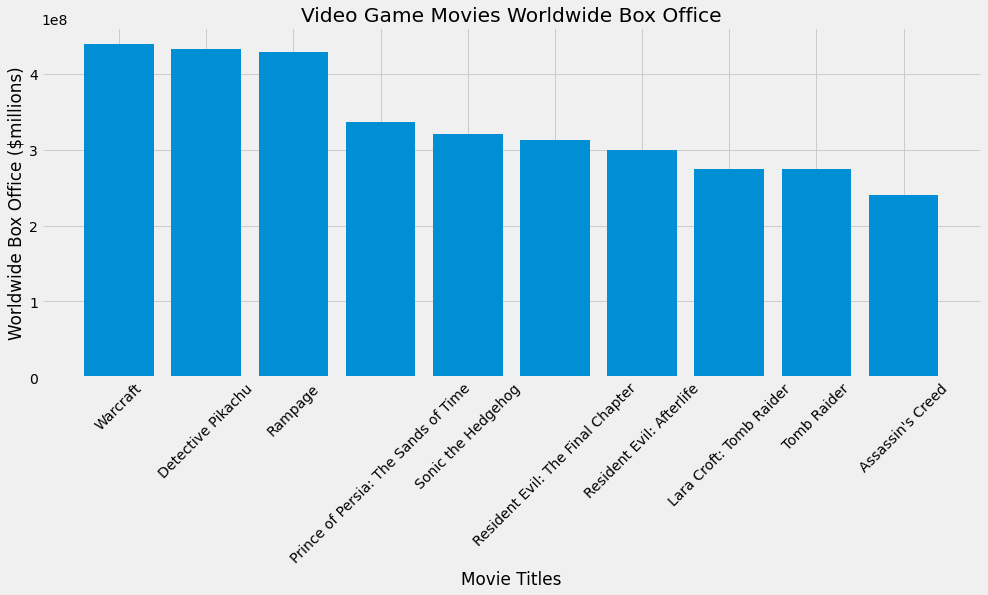

In [304]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.style.use('fivethirtyeight')

x=vid_games_plt_data['Title']
y=vid_games_plt_data['Worldwide box office']

ax.bar(x, height=y)

ax.set_xlabel('Movie Titles')
ax.set_ylabel('Worldwide Box Office ($millions)')
ax.set_title('Video Game Movies Worldwide Box Office')
plt.tick_params(axis='x', colors='black', direction='out', labelrotation=45)
plt.tick_params(axis='y', colors='black', direction='in');